## Objectives:

> Finding the best trade-off to link the *Modelling framework* to *Biological* and *Ecological* models.


The **mathematical/computational approach** is highly linked to the **availability and/or accessibility of information** on **model species** and **landscape**. For instance:
- Toxicokinetics: availability and/or accessibility of ingestion and excretion rate?
- Toxic effect pattern: threshold or continuous or both?
- Individual variability of lethal/sublethal responses to toxic: measurable? precision/accuracy?
- Type of sublethal response: growth? reproduction? behavior?
- Pollen dispersal: when, how, amount?
- Target site/plant species <-> Lepidoptera species
- ...

Hint: As this project aims at helping public authorities / stackeholders to make decision for Environmental Risk Assessment, we would like to promote an *Open Source* approach of the project life cycle: (i) open source and versioning of model coding, (ii) sourced and crystal clear decision process in the choice of parameters, ...

## Table of Content:
1. [Modelling framework](#model_frame)
2. [Landscape](#landscape)
    * [Patchy landscape](#patch)
    * [Dispersal](#dispersal)
    * [Exposure](#exposure)
3. [Individual](#individual)

# Introduction

## Environmental Risk Assessment

See EFSA report [EFSA report 2013 - Guidance from the GMO Panel](bib/EFSA2013_guidance_GMO_Panel.pdf)

![EFSA_ERA_steps](img/EFSA_Report_ERA.png)


Compared to **briskaR** modelling framework [Walker et al., 2017](bib/Walker2017.pdf).

![Modelling_framework](img/Walker2018_Modelling_framework.png)

## References

- @Walker2017Spatio: [Walker et al., 2017](bib/Walker2017.pdf)
- @Leclerc2018: [Leclerc et al., 2018](bib/LeclercMelen2018.pdf)

# 1. Modelling framework <a class="anchor" id="model_frame"></a>

This is a great introduction

In [24]:
library(DiagrammeR)
mermaid("
graph LR
Land[Landscape]
Land---Land1(Sources)
Land---Land2(Receptors)
Land---Land3(Neutral)
Land1-->Disp[Dispersal]
Disp---Disp1(Kernel)
Disp---Disp2(Pollen amount)
Disp1---Disp3(Convolution)
Disp2---Disp3
Disp-->Exp[Exposure]
Exp-->Exp1(loss: Rain)
Exp-->Ind[Individuals]
Land2-->Ind
Ind-->Ind0(Life traits)
Ind-->Ind1(Toxicokinetics)
Ind-->Ind2(Toxicodynamics)
")

HTML widgets cannot be represented in plain text (need html)

# 2. Landscape <a class="anchor" id="landscape"></a>

 ## 2.2 Patchy landscape <a class="anchor" id="patch"></a>
 
 The spatial domain $\omega \subset \mathbb{R}^2$ is partitioned into $N$ cells $C_n$ such as: $n = \{ 1, \dots, N \}$; $\omega = \cup_{n=1}N C_n$; $C_n \cap C_{m} = \emptyset$.
 
 Then, each cell is marked by a type variable $T_n$ indicating that the cell $C_n$ is a source of contaminant, a receptor or neutral.

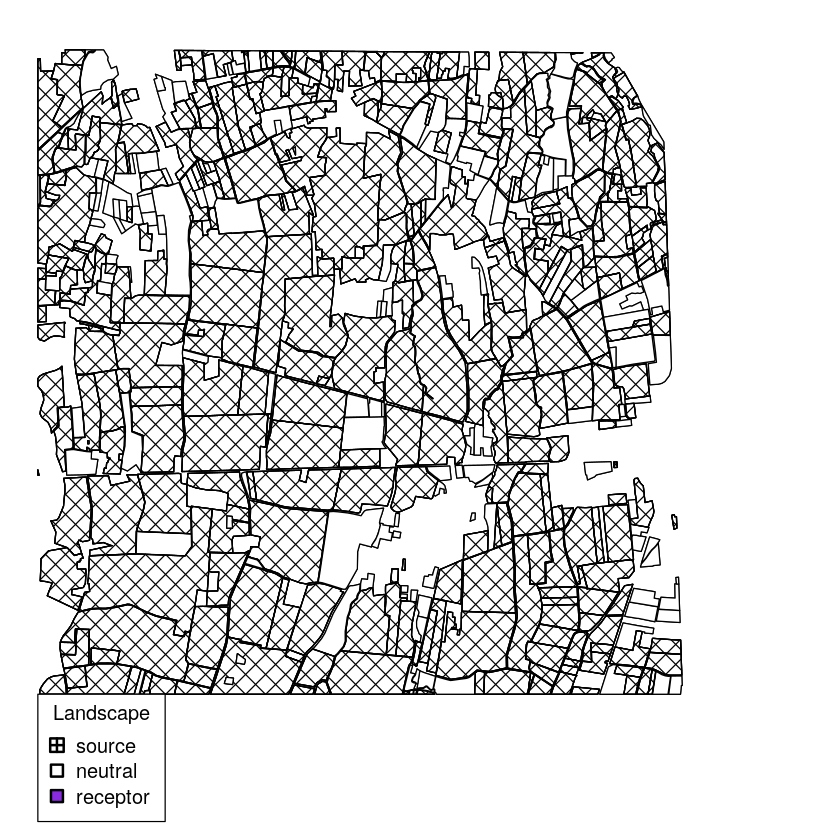

In [2]:
library(briskaR)
data("maize_65")
plot(maize_65)

## 2.3 Dispersal <a class="anchor" id="dispersal"></a>


Intensity of dispersion at site $y$ and time $t$, denoted $\lambda^{disp}(y,t)$, is given by:

$$
\lambda^{disp}(y,t) = \int_{\Omega} \tilde{E}(x,t) K(y-x)dx = \tilde{E} \otimes K(y,t)
$$
where:
- $\tilde{E}(x,t)$: spatio-temporal emission function (see hereafter),
- $K(y,t)$: dispersal kernel (see hereafter).

### 2.3.1 Emission

Let $\mathcal{N}$ be the set of indices $n$ in $\left\{1, \dots, N \right\}$ such that $T_n = sources$.

The spatio-temporal emission function $(x,t) \mapsto \tilde{E}(x,t)$ taking into account all the sources of emission is:

$$
\tilde{E}(x,t) = \sum_{n \in \mathcal{N}_{sources} \mathbb{1}(x \in C_n)E_n(t)}
$$
where:
- $\mathbb{1}(.)$: indicator function,
- $C_n$: ???
- $E_n(t)$: ???

### 2.3.2 Kernel


### 2.3.3 Convolution

Convolution product of $\tilde{E}$ and $K$ is obtained by computing FFT (Fast Fourier Transform). Since the Fourier transform $\mathcal{F}$ of the convolution product of the two functions $\tilde{E}$ and $K$ is equal to the simple product of their Fourier trnasforms:

$$
\mathcal{F}\left( \tilde{E} \otimes K \right) = \mathcal{F}(\tilde{E})\mathcal{F}(K)
$$

the convolution is given by:

$$
 \tilde{E} \otimes \mathcal{F}(K) = \mathcal{F}^{-1}\left( \mathcal{F}(\tilde{E}) \mathcal{F}(K) \right)
$$

## 2.4 Exposure <a class="anchor" id="exposure"></a>

Local concentration of contaminants

$$
\lambda_{local}(y,t) = \left[ 1- \alpha(Z(t)) \right]\lambda_{local}(y, t-1) + \beta\lambda_{disp}(y,t)
$$

with:
- $\lambda_{local}$: intensity of availbale contaminants at site $y$ and time $t$,
- $\lambda_{disp}(y,t)$: intensity of dispersed contaminant at site $y$ and time $t$ from dispersal,
- $\alpha(.) \in [0,1]$: rate of lost of the local concentration of contaminant (i.e. fraction of contaminant lost from $t-1$ to $t$),
- $Z(t)$: time-varying environmental covariate of contaminant lost (e.g. rain),
- $\beta \in [0,1]$: rate ofnewly arriving contaminant that is kept (e.g. pollen that adhere to plants on which insects live and feed, whereas the other fraction of pollen is deposited on other substrats, nonhost by insects),

Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3


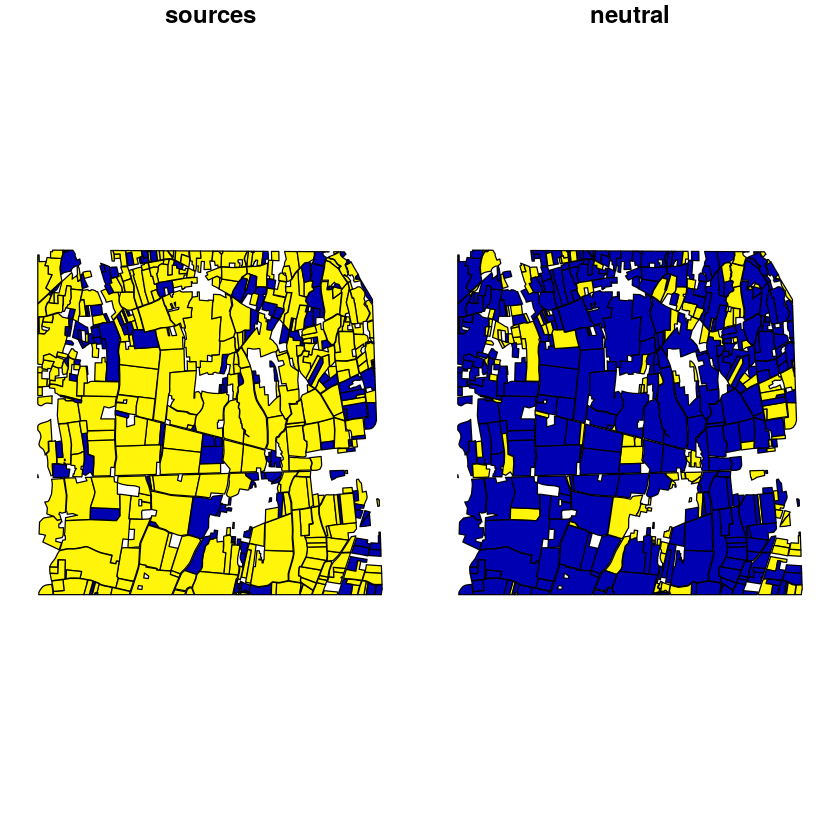

In [3]:
library(briskaR)
library(sf)
data(sf_maize_65)

plot(sf_maize_65)